In [69]:
# BASIC DS LIBS
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FILE IO LIBS
import os 
from os.path import join 

# GEOSPATIAL LIBS
from osgeo import gdal
import geopandas as gpd
from geopandas import GeoDataFrame

# PLOT LIBS
import plotly.express as px 
from plotly.offline import plot
import plotly.graph_objects as go
from shapely.geometry import Point
from plotly.subplots import make_subplots


In [70]:
# IMPORT DATA
hunger_data = pd.read_csv(r'data/foodlink_data.csv')
mealmap_data = pd.read_excel(r'data/MMG2022_2020-2019Data_ToShare.xlsx')
gun_data = pd.read_csv(r'data/Rochester_NY_Shooting_Victims.csv')

### EDA

#### DATA CLEANING

In [71]:
gun_data.head()
print(gun_data.columns)

Index(['X', 'Y', 'ID', 'Case_Number', 'Address', 'Occurred_Date',
       'Occurred_Month', 'Occurred_Year', 'Crime_Type', 'Multiple_Shooting',
       'Gender', 'Race', 'Ethnicity', 'Victim_Age', 'Victim_Age_Band',
       'Latitude', 'Longitude', 'ObjectId'],
      dtype='object')


In [72]:
# GUN DATA CLEANING
gun_data = gun_data.drop(columns=[
                        'ID',
                        'Case_Number',
                        'Occurred_Month',
                        'Occurred_Year',
                        'Gender',
                        'Race',
                        'Ethnicity',
                        'Victim_Age',
                        'Victim_Age_Band',
                        'ObjectId'
                        ])

print(gun_data.info())  # to check for any missing values
gun_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  4679 non-null   float64
 1   Y                  4679 non-null   float64
 2   Address            4679 non-null   object 
 3   Occurred_Date      4679 non-null   object 
 4   Crime_Type         4679 non-null   object 
 5   Multiple_Shooting  4679 non-null   object 
 6   Latitude           4679 non-null   float64
 7   Longitude          4679 non-null   float64
dtypes: float64(4), object(4)
memory usage: 292.6+ KB
None


,X,Y,Address,Occurred_Date,Crime_Type,Multiple_Shooting,Latitude,Longitude
0,-77.610890,43.184163,442 Remington St,2022/06/01 04:00:00+00,Shooting,No,43.184163,-77.610890
1,-77.598893,43.181793,904 Hudson Ave,2022/05/29 04:00:00+00,Homicide,No,43.181793,-77.598893
2,-77.630378,43.142970,168 Bartlett St,2022/05/29 04:00:00+00,Shooting,No,43.142970,-77.630378
3,-77.580628,43.167216,720 N Goodman St,2022/05/28 04:00:00+00,Shooting,No,43.167216,-77.580628
4,-77.641972,43.162394,138 Murray St,2022/05/26 04:00:00+00,Shooting,No,43.162394,-77.641972


In [73]:
# HUNGER DATA
hunger_data.columns = ['Zip Code', 'Latitude', 'Longitude', 'Food Insecurity']

# NARROW DOWN DATA TO JUST ROCHESTER AREAS
roc_zip = list(range(14604, 14624))
roc_zip.append(14626)
roc_zip.append(14627)
roc_zip.append(14642)
hunger_data = hunger_data.loc[hunger_data['Zip Code'].isin(roc_zip)]

print(hunger_data.info())   # to check for missing values
hunger_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 124 to 145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Zip Code         20 non-null     int64  
 1   Latitude         20 non-null     float64
 2   Longitude        20 non-null     float64
 3   Food Insecurity  20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes
None


,Zip Code,Latitude,Longitude,Food Insecurity
124,14626,43.2141,-77.7135,0.094
127,14623,43.0881,-77.6425,0.167
128,14622,43.2138,-77.5569,0.080
129,14621,43.1863,-77.6018,0.298
130,14620,43.1291,-77.6065,0.187


In [74]:
# PLOTTING BOTH CONTINUOUS, NUMERIC VARS
gun_plot = px.scatter_mapbox(
                        data_frame = gun_data,
                        lat = gun_data['Latitude'],
                        lon = gun_data['Longitude'],
                        color= gun_data['Crime_Type'],    # TODO: replace with our metric
                        text = gun_data['Crime_Type'],    # TODO: replace with our metric
                        hover_name = None,
                        hover_data= [gun_data['Occurred_Date'],gun_data['Address']],
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        title='Gun Violence Incidents by Zipcode',
                        height = 400,
                        width = 700
                        )



hunger_plot = px.scatter_mapbox(
                        data_frame = hunger_data,
                        lat = hunger_data['Latitude'],
                        lon = hunger_data['Longitude'],
                        color= hunger_data['Food Insecurity'],
                        zoom = 10,
                        hover_data = [hunger_data['Food Insecurity'],
                                      hunger_data['Zip Code']],
                                      
                        size = hunger_data['Food Insecurity'],
                        mapbox_style = 'open-street-map',
                        title='Rochester Zip Codes by Food Insecurity Rate',
                        height = 400,
                        width = 700,
                        color_continuous_scale='RdYlGn_r'
                )

gun_plot.show()
hunger_plot.show()

#### SUMMARY STATS OF EACH DATASET

In [75]:
# GET STATS
gun_stats = gun_data.describe()
hunger_stats = gun_data.describe()

# PRINT STATS
print("GUN VIOLENCE BASIC STATS:")
print(gun_stats, "\n")
print("HUNGER BASIC STATS:")
print(hunger_stats)

GUN VIOLENCE BASIC STATS:
                 X            Y     Latitude    Longitude
count  4679.000000  4679.000000  4679.000000  4679.000000
mean    -77.615629    43.166353    43.166353   -77.615629
std       0.023427     0.016363     0.016363     0.023427
min     -77.672811    43.115253    43.115253   -77.672811
25%     -77.635262    43.154277    43.154277   -77.635262
50%     -77.619800    43.169335    43.169335   -77.619800
75%     -77.597176    43.178504    43.178504   -77.597176
max     -77.538345    43.259854    43.259854   -77.538345 

HUNGER BASIC STATS:
                 X            Y     Latitude    Longitude
count  4679.000000  4679.000000  4679.000000  4679.000000
mean    -77.615629    43.166353    43.166353   -77.615629
std       0.023427     0.016363     0.016363     0.023427
min     -77.672811    43.115253    43.115253   -77.672811
25%     -77.635262    43.154277    43.154277   -77.635262
50%     -77.619800    43.169335    43.169335   -77.619800
75%     -77.597176    43

### COMPARING DATASETS AND VARIABLES

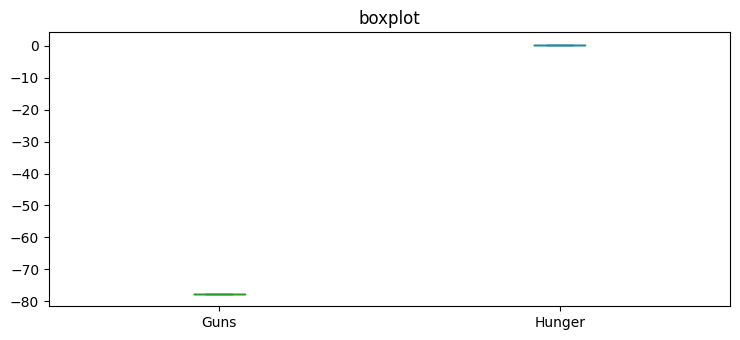

In [86]:
# COMPARE BY BOXPLOT

# GET DATA
gun_boxplot_data = gun_data['X'].quantile([0.25,0.5,0.75])   # TODO: change this to gun rate once done
hunger_boxplot_data = hunger_data['Food Insecurity'].quantile([0.25,0.5,0.75])
boxplots = pd.DataFrame({'Guns': gun_boxplot_data, 'Hunger': hunger_boxplot_data})

# SET FIGURE 
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = boxplots[['Guns','Hunger']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

<AxesSubplot: title={'center': 'box'}>

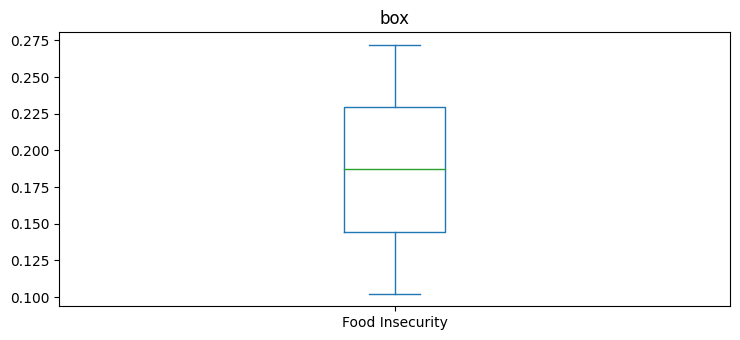

In [88]:
hunger_boxplot_data = hunger_data['Food Insecurity'].quantile([0.25,0.5,0.75])

hunger_boxplot_data.plot(kind="box",title='box')

#### MAKING OUR GUN DATA METRIC

In [89]:
gun_data.head()

,X,Y,Address,Occurred_Date,Crime_Type,Multiple_Shooting,Latitude,Longitude
0,-77.610890,43.184163,442 Remington St,2022/06/01 04:00:00+00,Shooting,No,43.184163,-77.610890
1,-77.598893,43.181793,904 Hudson Ave,2022/05/29 04:00:00+00,Homicide,No,43.181793,-77.598893
2,-77.630378,43.142970,168 Bartlett St,2022/05/29 04:00:00+00,Shooting,No,43.142970,-77.630378
3,-77.580628,43.167216,720 N Goodman St,2022/05/28 04:00:00+00,Shooting,No,43.167216,-77.580628
4,-77.641972,43.162394,138 Murray St,2022/05/26 04:00:00+00,Shooting,No,43.162394,-77.641972
